In [41]:
import pandas
import numpy
import matplotlib.pyplot as plt

import os
import scipy

import sklearn
import sklearn.feature_selection
import sklearn.ensemble

import fnmatch

import graphviz
import mpl_toolkits.mplot3d as plt3dd

import seaborn

import time

In [42]:
path_gdp = r".\Data\Africa_GDP.csv";

In [70]:
gdp_df = pandas.read_csv(path_gdp);
# gdp_df.set_index("Year", inplace=True);
countries_list = gdp_df.columns[gdp_df.columns != "Year"];

GDP_growth_perc = "_GrowthGDP";

In [73]:
gdp_df

,Year,Algeria,Benin,Botswana,Burkina Faso,Burundi,Cameroon,Central African Republic,Chad,Eswatini,...,Seychelles,Sierra Leone,Somalia,South Africa,Sudan,Tanzania,Togo,Uganda,Zambia,Zimbabwe
0,1960,2.723615e+09,2.261956e+08,3.041141e+07,3.304428e+08,1.960000e+08,6.142061e+08,1.121556e+08,3.135827e+08,3.507685e+07,...,1.201202e+07,3.221515e+08,1.804599e+08,8.748597e+09,1.127011e+09,2.651730e+09,1.710571e+08,4.230084e+08,7.130000e+08,1.052990e+09
1,1961,2.434747e+09,2.356682e+08,3.290261e+07,3.502472e+08,2.030000e+08,6.527776e+08,1.231346e+08,3.339753e+08,4.302604e+07,...,1.159202e+07,3.279792e+08,1.916599e+08,9.225996e+09,1.223563e+09,2.826179e+09,1.784971e+08,4.415241e+08,6.962857e+08,1.096647e+09
2,1962,2.001445e+09,2.364350e+08,3.564496e+07,3.795671e+08,2.135000e+08,6.942479e+08,1.244828e+08,3.576357e+08,4.592796e+07,...,1.264203e+07,3.428727e+08,2.035319e+08,9.813996e+09,1.329023e+09,3.101590e+09,1.867458e+08,4.490126e+08,6.931429e+08,1.117602e+09
3,1963,2.702982e+09,2.539277e+08,3.809184e+07,3.940407e+08,2.327500e+08,7.183208e+08,1.293791e+08,3.717670e+08,5.412944e+07,...,1.392303e+07,3.487007e+08,2.161459e+08,1.085420e+10,1.352011e+09,3.456579e+09,2.023059e+08,5.161478e+08,7.187143e+08,1.159512e+09
4,1964,2.909316e+09,2.698190e+08,4.161635e+07,4.103216e+08,2.607500e+08,7.766502e+08,1.420251e+08,3.922475e+08,6.498055e+07,...,1.539303e+07,3.720121e+08,2.295299e+08,1.195600e+10,1.389080e+09,3.748841e+09,2.345722e+08,5.890566e+08,8.394286e+08,1.217138e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2019,1.934600e+11,1.439071e+10,1.672591e+10,1.603281e+10,2.576519e+09,3.966776e+10,2.221301e+09,1.131495e+10,4.495267e+09,...,1.868690e+09,4.076579e+09,9.420431e+09,3.893300e+11,3.233808e+10,6.102673e+10,6.992700e+09,3.534816e+10,2.330867e+10,2.183223e+10
60,2020,1.648730e+11,1.568674e+10,1.496029e+10,1.772501e+10,2.649680e+09,4.077324e+10,2.326721e+09,1.071540e+10,3.982237e+09,...,1.382552e+09,4.062906e+09,9.204140e+09,3.382910e+11,2.703459e+10,6.606874e+10,7.400284e+09,3.760037e+10,1.813776e+10,2.150970e+10
61,2021,1.862650e+11,1.768762e+10,1.875095e+10,1.964317e+10,2.775799e+09,4.499352e+10,2.516498e+09,1.177998e+10,4.850843e+09,...,1.487174e+09,4.249235e+09,9.838712e+09,4.201180e+11,3.422951e+10,7.065563e+10,8.342244e+09,4.052979e+10,2.209642e+10,2.837124e+10
62,2022,2.255600e+11,1.742542e+10,2.032196e+10,1.882022e+10,3.338723e+09,4.364407e+10,2.382619e+09,1.239681e+10,4.790923e+09,...,2.057969e+09,4.094564e+09,1.041954e+10,4.052710e+11,5.166688e+10,7.576997e+10,8.169476e+09,4.556533e+10,2.916378e+10,2.736663e+10


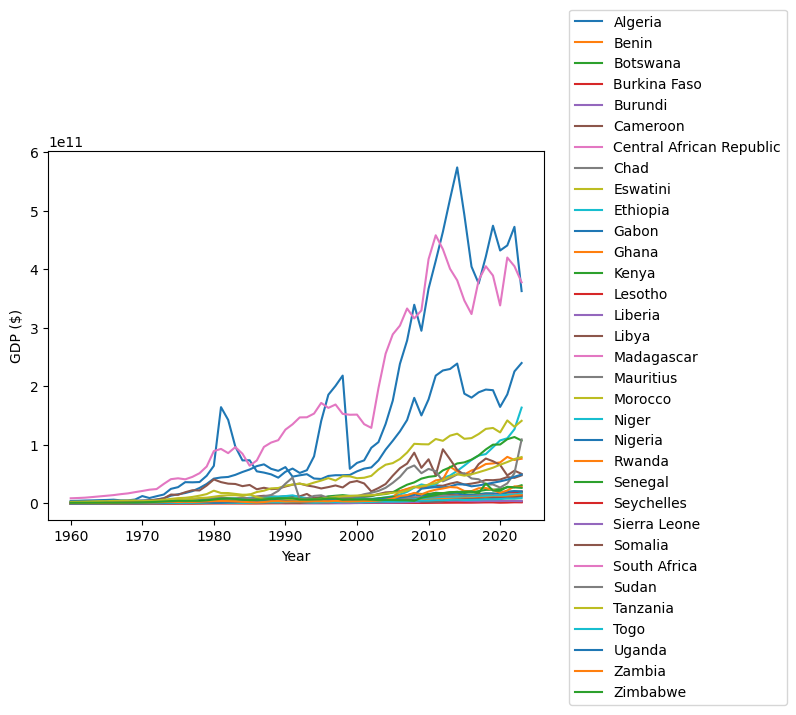

In [75]:
plt.figure()

for col in countries_list:
    plt.plot(gdp_df["Year"], gdp_df[col], label=col);

plt.ylabel("GDP ($)");
plt.xlabel("Year");
plt.legend(loc=[1.05, -0.50]);

To predict the GDP using of single country (relative to other countries) the following assumptions are made:

- A countries GDP is proportional (to a certain degree) to other (neighbouring/trading/partner) countries
- The GDP growth % of a relevant country will also have an impact on the target countries GDP

With that being said additional variables and data are needed to more granuarly predict the prosperity/decline of a country (econmical, political, logistical factors being important variables that are not accounted for here). To fudge for this factor we can aproximate the countries according to groupings. The groupings can be made with a unsupervised learing mode. Initial groupings will be set to 4 (depending on performace). The hopes are that the categories might group according to a trend. For example some categories might be:

1) Good faring landlocked (Botswanna / Namibia)
2) Bad faring landlocked 
3) Good faring with seaside acces (South Africa / Nigeria)
4) Bad faring with seaside acces (Zimbabwe)

Without properly analsing the results the categories cannot be deciphered. Adding too much categories might lead to overfitting. For now 2 machine learning modesl will be tested with and without groupings.

We can preprocess some data for better results. The more non-linear a trend is the harder it is to predict. To this account for this a natural logarith is applied to the GDP. 

In [76]:
gdp_preproc_df = pandas.DataFrame(); 

for country in countries_list:
    gdp_preproc_df[country + GDP_growth_perc] = gdp_df[country].diff() / gdp_df[country]
    gdp_preproc_df["ln_" + country] = numpy.log(gdp_df[country]);

gdp_preproc_df["Year"] = gdp_df["Year"];

gdp_preproc_df.dropna(inplace=True);    # adter applying the differential remove the NA, THe growth perc is based on the previous year

In [313]:
scaler = sklearn.preprocessing.StandardScaler();
ml_model = sklearn.linear_model.LinearRegression(n_jobs=3);

pipe = sklearn.pipeline.make_pipeline(scaler, ml_model);

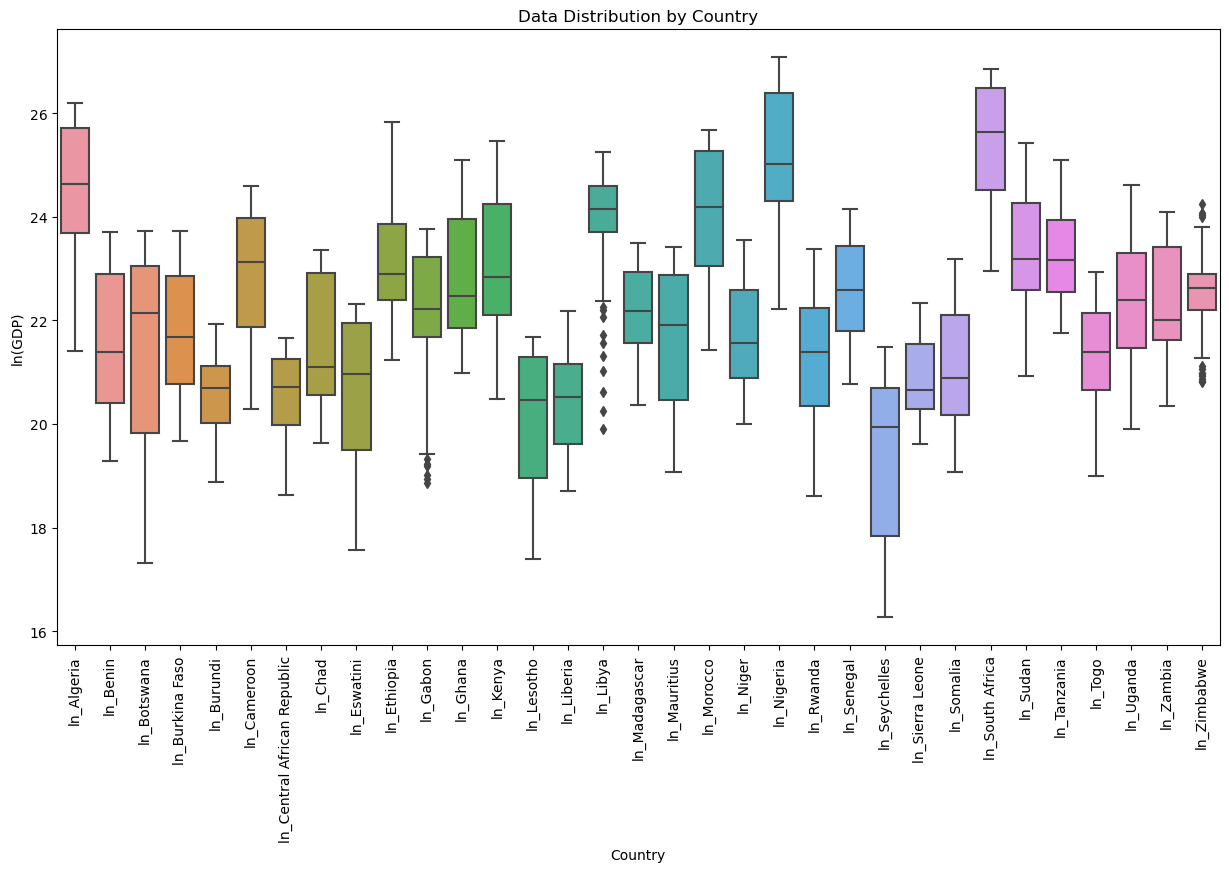

In [98]:
plt.figure(figsize=(15, 8));
seaborn.boxplot(gdp_preproc_df["ln_" + countries_list]);
plt.xticks(rotation=90)
plt.title("Data Distribution by Country")
plt.xlabel("Country");
plt.ylabel("ln(GDP)");
plt.show()

Looking at the above graph, the following groupings can be geustimated:

1) Countries with a large or small variance (Seychelles, Zimbabwe)
3) Countries with where abs(Q3 - Median) > abs(Q1 - Median) and vice versa  ( doesn taccount for positive growth in the last couple of years)
4) Countries with high, average and low GDPs
5) Countires with a significant outliers (Zimbabwe, Libya)

Only upon closer inspection can the resulting groupings be named